# Multivariable Regression and Valuation Model

## Context: Introduction

<img src="https://i.imgur.com/WKQ0nH2.jpg" width="400">

Welcome to Boston, Massachusetts in the 1970s! Imagine you’re working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
- The number of rooms
- The distance to employment centres
- How rich or poor the area is
- How many students there are per teacher in local schools etc

<img src="https://i.imgur.com/WfUSSP7.png" width="300">

## Learning Objectives

To accomplish your task, you will:
1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model’s coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

## Data Source

This is the Boston House Price Dataset.

**Characteristics:**  
- Number of Instances: 506  
- Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.  
- Missing Attribute Values: None  
- Creator: Harrison, D. and Rubinfeld, D.L.  

**Attribute Information (in order):**
1. **CRIM**     per capita crime rate by town  
2. **ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.  
3. **INDUS**    proportion of non-retail business acres per town  
4. **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
5. **NOX**      nitric oxides concentration (parts per 10 million)  
6. **RM**       average number of rooms per dwelling  
7. **AGE**      proportion of owner-occupied units built prior to 1940  
8. **DIS**      weighted distances to five Boston employment centres  
9. **RAD**      index of accessibility to radial highways  
10. **TAX**     full-value property-tax rate per \$10,000  
11. **PTRATIO** pupil-teacher ratio by town  
12. **B**       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
13. **LSTAT**   % lower status of the population  
14. **PRICE**   Median value of owner-occupied homes in $1000’s  

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.  
You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).

# Setup

## Import Statements

Import the required libraries for data science workflows including pandas, numpy, seaborn, plotly, matplotlib, and scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

We will display floating point numbers with two decimal places for better readability.

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

The first column in the `.csv` file just has the row numbers, so it will be used as the index. We load the Boston housing data using pandas.

In [3]:
# Read the data
data = pd.read_csv('boston.csv', index_col=0)

# Preliminary Data Exploration 🔎

Let’s take a closer look at the data. This initial exploration helps us understand the dataset structure and content before analysis.

## Challenge: Get Familiar with Data

- What is the shape of `data`?  
- How many rows and columns does it have?  
- What are the column names?  
- Are there any NaN values or duplicates?

### First Five Rows

View the first few rows to understand the sort of values and columns available.

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


### Data Shape

Check how many rows and columns are present in the dataset.

In [5]:
data.shape

(506, 14)

### All Columns

List the column names available in the data.

In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

## Data Cleaning 
Check for Missing Values and Duplicates

In [7]:
# any nan?
data.isna().values.any()

np.False_

In [8]:
# any duplicates?
data.duplicated().values.any()

np.False_

In [9]:
# data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


## Descriptive Statistics

**Challenge**

* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature? 
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


**As we can see from above:**
- No of students per teacher on average = 18.46
- The average price of a home in the dataset = 22.53
- The CHAS feature = `Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)`
- The minimum and the maximum value of the CHAS and why = 0, 1
- The maximum and the minimum number of rooms per dwelling in the dataset = 8.78, 3.56

# Visualise the Features

**Challenge**: Having looked at some descriptive statistics, visualise the data for your model. Use [Seaborn's `.hisplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables: 
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 

What do you notice in the distributions of the data? 

## House Prices 💰

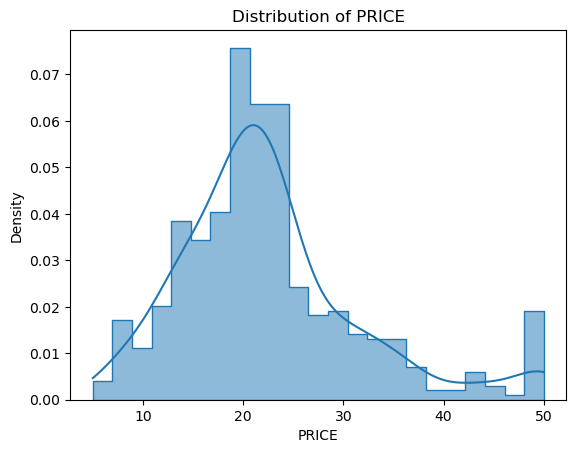

In [40]:
sns.histplot(data=data, x='PRICE', kde=True, element='step', stat='density')
plt.title('Distribution of PRICE')
plt.xlabel('PRICE')
plt.ylabel('Density')
plt.show()


#### General Insights
   * Positively skewed (long right tail).
   * Most houses are priced below \~20–25, with a few very high values reaching close to 50.
   * Suggests the presence of outliers at the higher end.

## Distance to Employment - Length of Commute 🚗

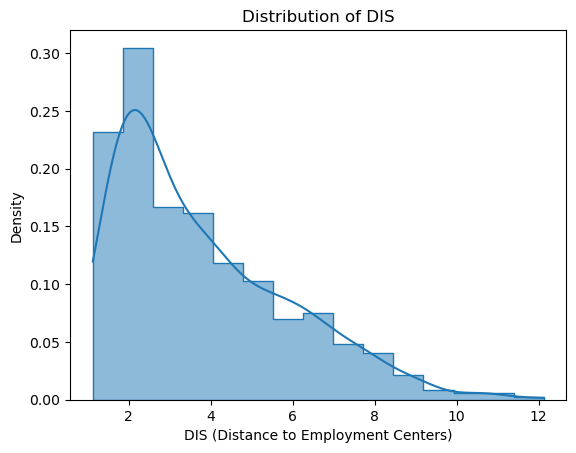

In [41]:
sns.histplot(data=data, x='DIS', kde=True, element='step', stat='density')
plt.title('Distribution of DIS')
plt.xlabel('DIS (Distance to Employment Centers)')
plt.ylabel('Density')
plt.show()

#### General Insights:
   * Strongly right-skewed.
   * Many values are concentrated at very small distances (1–3), with a long tail extending to higher values.
   * Shows most houses are close to employment hubs, with fewer being very far away.

## Number of Rooms

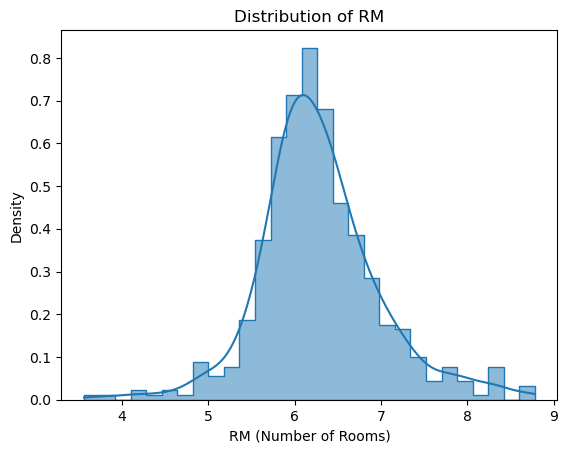

In [44]:
sns.histplot(data=data, x='RM', kde=True, element='step', stat='density')
plt.title('Distribution of RM')
plt.xlabel('RM (Number of Rooms)')
plt.ylabel('Density')
plt.show()

#### General Insights:
   * Roughly bell-shaped, peaking around 6 rooms.
   * Fairly symmetric compared to others.
   * Indicates most houses cluster around 5–7 rooms, with fewer extreme values.


## Access to Highways 🛣

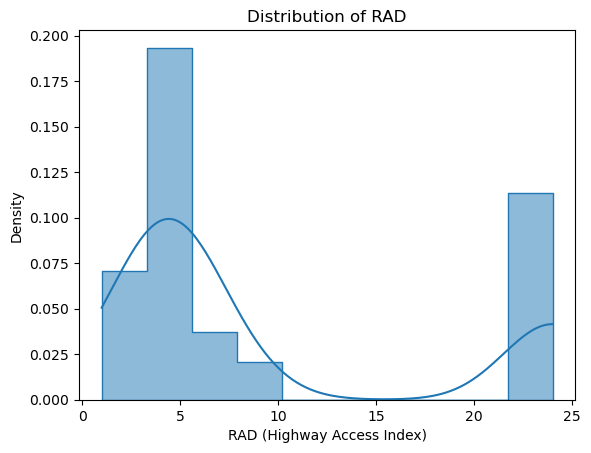

In [45]:
sns.histplot(data=data, x='RAD', kde=True, element='step', stat='density')
plt.title('Distribution of RAD')
plt.xlabel('RAD (Highway Access Index)')
plt.ylabel('Density')
plt.show()

#### General Insights:
   * Highly discrete-looking distribution.
   * Shows distinct spikes at certain values (since RAD is categorical-like, taking small integer values).
   * Long right tail, but clustered around small integers.


## **Challenge**: Next to the River? ⛵️

Create a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it. The bar chart should look something like this:

<img src=https://i.imgur.com/AHwoQ6l.png width=500>

You can make your life easier by providing a list of values for the x-axis (e.g., `x=['No', 'Yes']`)

In [55]:
river_group = data.groupby("CHAS", as_index=False).agg({'RM': "count"})

In [56]:
river_group.head()

,CHAS,RM
0,0.00,471
1,1.00,35


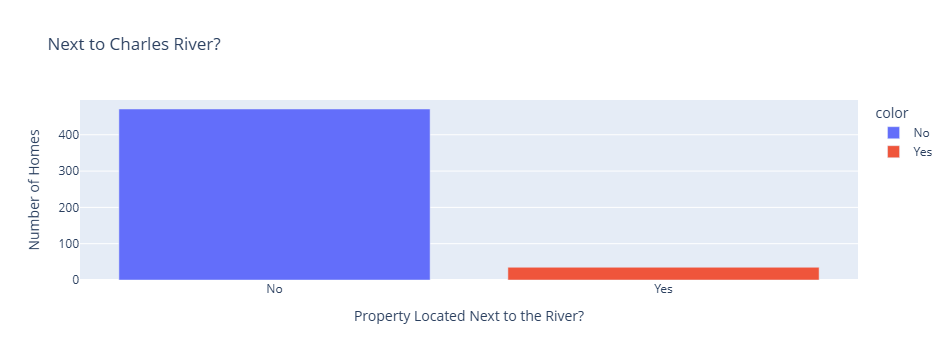

In [60]:
bar = px.bar(
    data_frame=river_group,
    x=['No', 'Yes'],
    y='RM',
    color=['No', 'Yes'],
    title='Next to Charles River?'
)
bar.update_layout(xaxis_title='Property Located Next to the River?',
                  yaxis_title='Number of Homes',)    
bar.show()

# Understand the Relationships in the Data

In [62]:
data.shape

(506, 14)

### **Challenge**:  Run a Pair Plot

There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)? 
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices? 

Run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. Note, this is a big task and can take 1-2 minutes! After it's finished check your intuition regarding the questions above on the `pairplot`. 

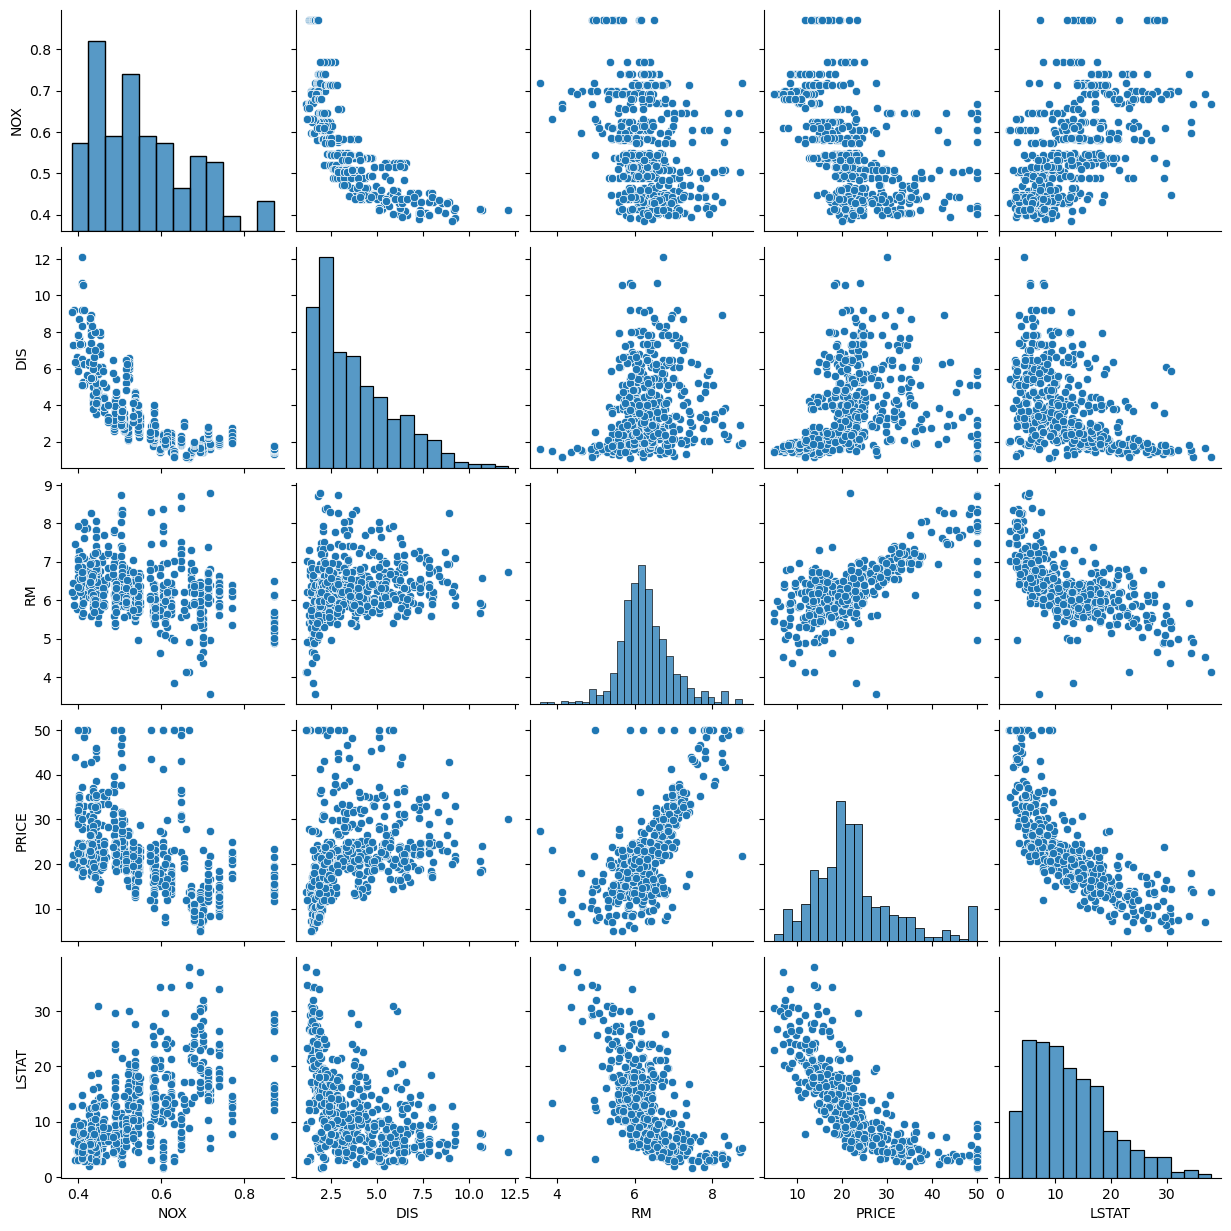

In [63]:
sns.pairplot(data[['NOX', 'DIS', 'RM', 'PRICE', 'LSTAT']]) # Lets take only column we want to compare
plt.show()

### Insights
- **NOX vs. DIS**: There is a **negative correlation** between pollution (NOX) and the distance to employment (DIS). The scatter shows that as the distance to employment centers increases, the levels of pollution tend to decrease. This makes sense as areas farther away from industrial or commercial hubs, which are often sources of pollution, are likely to have cleaner air.

- **RM vs. PRICE**: There is a **positive correlation** between the number of rooms (RM) and home value (PRICE). The scatter plot shows a clear upward trend: as the number of rooms in a home increases, its price also tends to increase. This is an intuitive relationship, as larger homes generally have more rooms and are more valuable.

- **LSTAT vs. PRICE**: There is a **negative correlation** between the amount of poverty in an area (LSTAT) and home prices (PRICE). The scatter plot shows a clear downward trend. As the percentage of the population that is low-status (LSTAT) increases, the median home value tends to decrease. This is a common economic observation, as areas with higher poverty rates generally have lower property values.

## Run a Joint Plot

Use [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

Try adding some opacity or `alpha` to the scatter plots using keyword arguments under `joint_kws`.

### Challenge: Distance from Employment vs. Pollution 

- Compare `DIS` (Distance from employment) with `NOX` (Nitric Oxide Pollution) using Seaborn's `.jointplot()`.
-  Does pollution go up or down as the distance increases? 

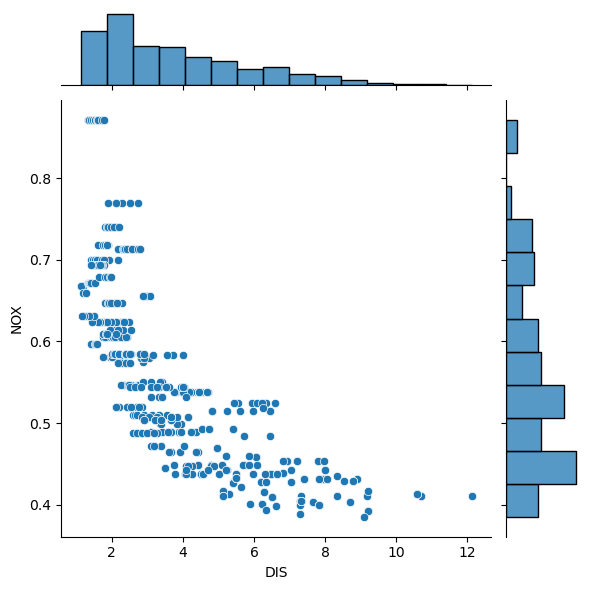

In [65]:
sns.jointplot(data=data, x="DIS", y="NOX")
plt.show()

we can see that as distance increases the polution decreases.

### Challenge: Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 

- Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`.
- Does pollution go up or down as there is a higher proportion of industry?

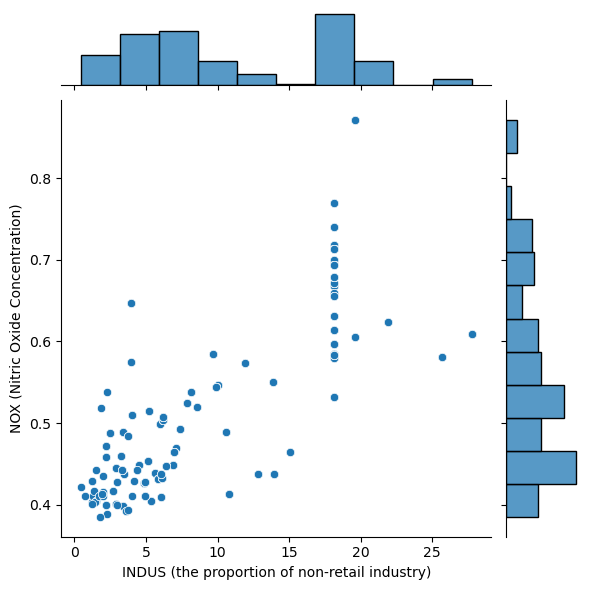

In [72]:
# Create jointplot
sns.jointplot(
    data=data, 
    x="INDUS", 
    y="NOX"
)

# Add labels
plt.xlabel("INDUS (the proportion of non-retail industry)")
plt.ylabel("NOX (Nitric Oxide Concentration)")

plt.show()


> A positive correlation. As industrial land (INDUS) increases, pollution (NOX) tends to increase.

### Challenge: % of Lower Income Population vs Average Number of Rooms

- Compare LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`.
- How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

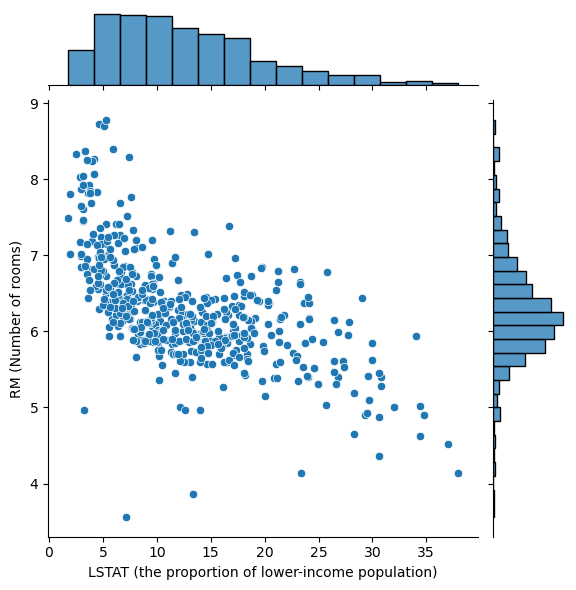

In [73]:
# Create jointplot
sns.jointplot(
    data=data, 
    x="LSTAT", 
    y="RM"
)

# Add labels
plt.xlabel("LSTAT (the proportion of lower-income population)")
plt.ylabel("RM (Number of rooms)")

plt.show()

**Interpretation:**
> As LSTAT increases, RM decreases → neighborhoods with a higher proportion of lower-income households tend to have smaller houses (fewer rooms).

### Challenge: % of Lower Income Population versus Home Price

- Compare LSTAT with PRICE using Seaborn's `.jointplot()`.
- How does the proportion of the lower-income population in an area affect home prices?

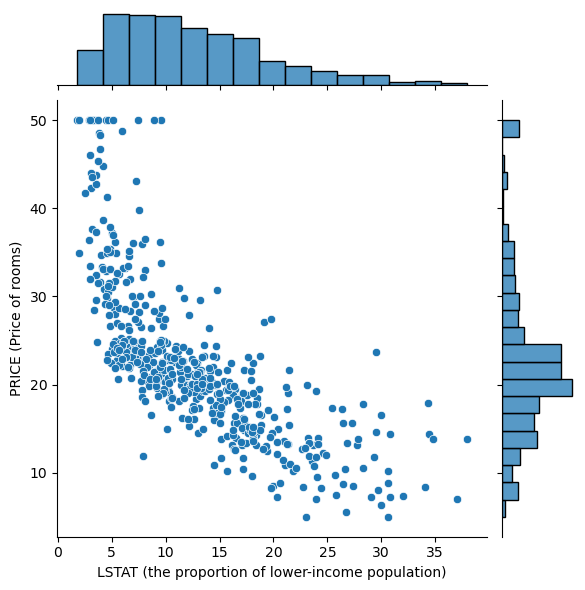

In [74]:
# Create jointplot
sns.jointplot(
    data=data, 
    x="LSTAT", 
    y="PRICE"
)

# Add labels
plt.xlabel("LSTAT (the proportion of lower-income population)")
plt.ylabel("PRICE (Price of rooms)")

plt.show()

**Interpretation:**
>As `LSTAT` increases, `PRICE` decreases → neighborhoods with more lower-income households tend to have lower housing prices.

### Challenge: Number of Rooms versus Home Value

- Compare RM (number of rooms) with PRICE using Seaborn's `.jointplot()`.
-  You can probably guess how the number of rooms affects home prices. 😊 

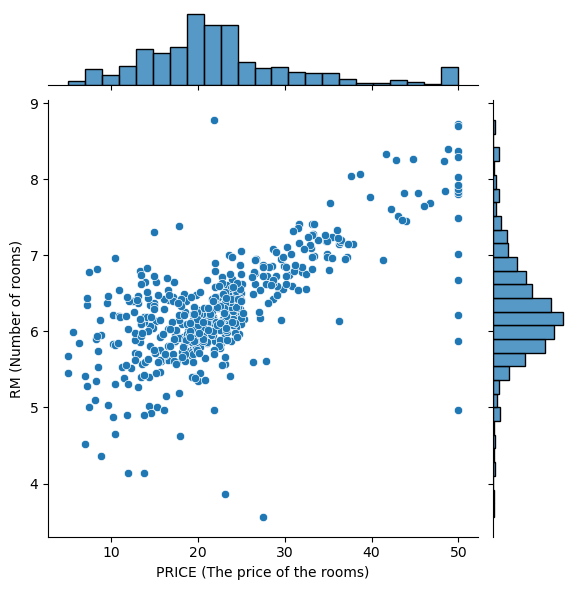

In [76]:
# Create jointplot for RM and PRICE
sns.jointplot(
    data=data, 
    x="PRICE", 
    y="RM"
)

# Add labels
plt.xlabel("PRICE (The price of the rooms)")
plt.ylabel("RM (Number of rooms)")

plt.show()

**Interpretation:**
>RM (average number of rooms per dwelling) has one of the strongest positive correlations with PRICE (median value of homes).
Intuitively, this makes sense:
>>More rooms → larger houses → higher property value.

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world. 

**Challenge**

* Import the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn
* Create 4 subsets: X_train, X_test, y_train, y_test
* Split the training and testing data roughly 80/20. 
* To get the same random split every time you run your notebook use `random_state=10`. This helps us get the same results every time and avoid confusion while we're learning. 


Hint: Remember, your **target** is your home PRICE, and your **features** are all the other columns you'll use to predict the price. 


In [78]:
# separate feature and target varibles
X = data.iloc[:, :-1]
y = data.PRICE

In [81]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [82]:
# Lets split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [83]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

# Multivariable Regression

In a previous lesson, we had a linear model with only a single feature (our movie budgets). This time we have a total of 13 features.\
Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

## Challenge: Run Your First Regression

Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [85]:
# Instantiate the Model
model = LinearRegression()

In [86]:
# train the model on the train data
model.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

## Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

**Challenge** Print out the coefficients (the thetas in the equation above) for the features. Hint: You'll see a nice table if you stick the coefficients in a DataFrame. 

* We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
* What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
* Check the other coefficients. Do they have the expected sign?
* Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room? 

In [93]:
# for better viz lets convert it to the dataframe
pd.DataFrame([model.coef_], columns=X.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.13,0.06,-0.01,1.97,-16.27,3.11,0.02,-1.48,0.30,-0.01,-0.82,0.01,-0.58


In [94]:
print("Intercept:", model.intercept_)

Intercept: 36.53305138282447


### 1. **RM vs PRICE**

* From scatter plots, **more rooms → higher price**.
* In the regression, the **coefficient of RM is positive**.
  👉 Yes, this matches intuition and the earlier visual analysis.

---

### 2. **LSTAT vs PRICE**

* Scatter plot showed **higher LSTAT (lower-income population) → lower price**.
* In the regression, the **coefficient of LSTAT is negative**.
  👉 Yes, it matches both intuition and the scatter plot.

---

### 3. **Other coefficients**

* `NOX` (pollution) → coefficient should be **negative** (higher NOX → lower price).
* `DIS` (distance to employment centers) → often **positive** (further away suburban homes sometimes more valuable).
* `AGE` (older homes) → usually **negative** (older homes valued less), here it is positive.
* `TAX` (property tax rate) → typically **negative**.
  👉 So, most coefficients align with economic/urban intuition.

---

### 4. **Extra room premium**

* Here our model gave **coefficient for RM = 3.11** .
* Interpretation:

  * Each extra room adds about **\$3.11k** to the predicted median home price (since the dataset’s price is in \$1000s).
  * So, 6-room house vs 5-room house → premium ≈ **\$3110**.

---

## Analyse the Estimated Values & Regression Residuals

It’s time to evaluate how well our regression model fits the training data. While \( R^2 \) tells us about the proportion of variance explained,\
we also need to examine **residuals**: the differences between the predicted values ($\hat y_i$) and the true values ($y_i$).

### Making Predictions

Let's generate predictions for both training and test data:

In [118]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Plot Actual vs Predicted (Training Set)

Scatter actual prices (`y_train`) against predicted prices (`y_train_pred`).\
The cyan line plots the perfect prediction reference $(y_{\text{train}}$ vs $y_{\text{train}}$).

<img src=https://i.imgur.com/YMttBNV.png width=300>

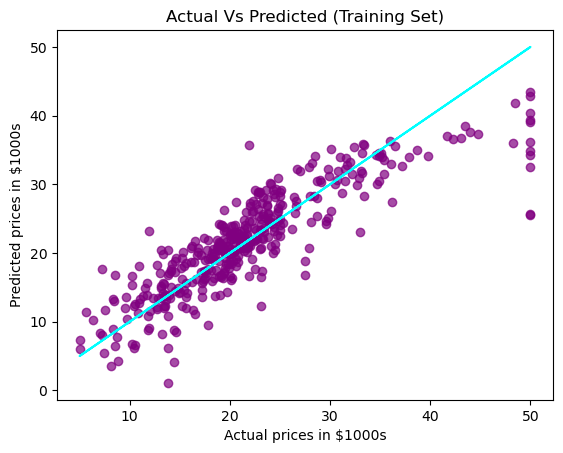

In [119]:
plt.scatter(y_train, y_train_pred, c='purple', alpha=0.7)
plt.plot(y_train, y_train, c='cyan')  # Cyan reference line
plt.xlabel("Actual prices in $1000s")
plt.ylabel("Predicted prices in $1000s")
plt.title("Actual Vs Predicted (Training Set)")
plt.show()

### Plot Residuals vs Predicted (Training Set)

Residuals reveal areas where the model isn't fitting well. Ideally, residuals should look scattered without a pattern.

<img src=https://i.imgur.com/HphsBsj.png width=300>

In [120]:
# Calculate the residuals
residuals = y_train - y_train_pred

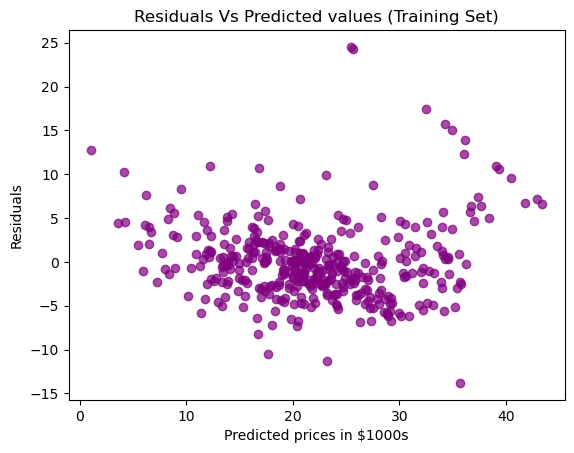

In [121]:
plt.scatter(y_train_pred, residuals, c='purple', alpha=0.7)
plt.xlabel("Predicted prices in $1000s")
plt.ylabel("Residuals")
plt.title("Residuals Vs Predicted values (Training Set)")
plt.show()

### Residual Distribution Analysis
In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 

<img src=https://i.imgur.com/7QBqDtO.png width=300>

Why is the residual plot important? The goal is to ensure residuals look **random**. Patterns mean bias in the model. If the residuals are distributed like a normal curve with mean and skew close to zero, that’s a sign of a well-behaved linear regression.

**Challenge**

* Calculate the mean and the skewness of the residuals. 
* Again, use Seaborn's `.histplot()` to create a histogram and superimpose the Kernel Density Estimate (KDE)
* Is the skewness different from zero? If so, by how much? 
* Is the mean different from zero?

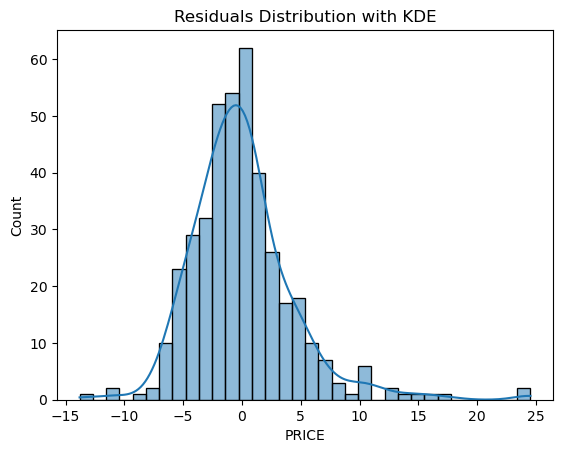

In [122]:
# Visualise distribution
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution with KDE")
plt.show()

We can see that residuals are rightly skewed.

In [123]:
# Calculate mean and skew
mean_resid = residuals.mean()
var_resid = residuals.var()
skew_resid = stats.skew(residuals)
print("Mean of residuals:", mean_resid)
print("Variance of residuals:", var_resid)
print("Skewness of residuals:", skew_resid)

Mean of residuals: 4.731089007907598e-15
Variance of residuals: 19.278578132175472
Skewness of residuals: 1.4540184980077695


#### Interpretation

- **Mean close to zero** indicates unbiased predictions on average.
- **Skewness 1.45** signals the residuals are slightly right-skewed, not perfectly normal.
- Ideally, we'd like skewness ≈ 0, so minor right skew suggests possible outliers or a mild model bias.

> Since residuals are skewed and not random, transformations, interaction terms, or even nonlinear models should be investigated to improve the fit.

---

## Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 

Let's try a data transformation approach. 

**Challenge**

Investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation. 

* Use Seaborn's `.displot()` to show a histogram and KDE of the price data. 
* Calculate the skew of that distribution.
* Use [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Plot the log prices using Seaborn's `.displot()` and calculate the skew. 
* Which distribution has a skew that's closer to zero? 


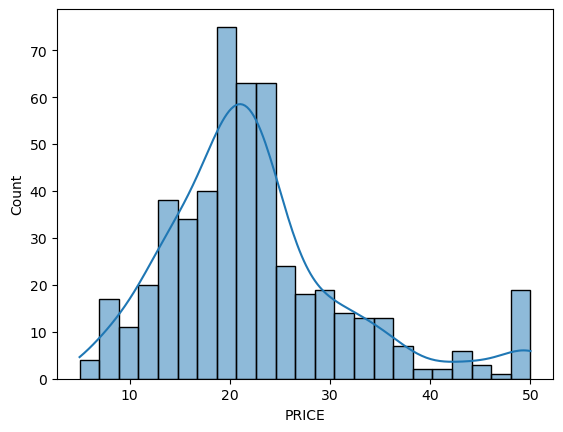

In [124]:
sns.histplot(data.PRICE, kde=True)
plt.show()

In [125]:
stats.skew(data.PRICE)

np.float64(1.104810822864635)

**From graph and calculation that PRICE column is skewed.**

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png width=300>

We can see this when we plot the actual prices against the (transformed) log prices. 

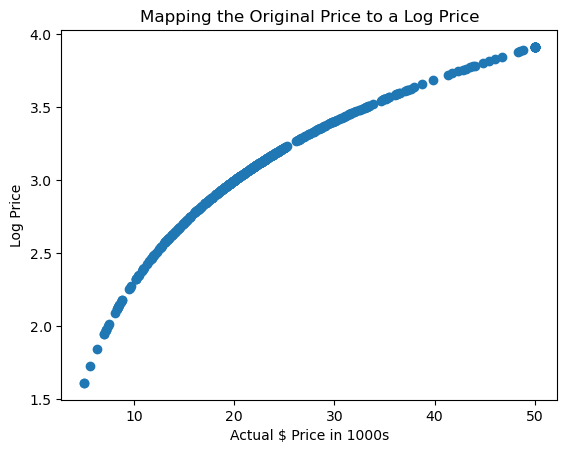

In [128]:
# lets plot (y,log(y)) just for visualization
plt.scatter(data.PRICE, np.log(data.PRICE))
plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 1000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

**Challenge**: 

* Use `train_test_split()` with the same random state as before to make the results comparable. 
* Run a second regression, but this time use the transformed target data. 
* What is the r-squared of the regression on the training data? 
* Have we improved the fit of our model compared to before based on this measure?


### Transform target
Now will transform the target variable

In [129]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Train model on transformed target

In [130]:
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

LinearRegression()

### Predict (in log scale)

In [131]:
y_train_pred_log = model_log.predict(X_train)
y_test_pred_log = model_log.predict(X_test)

## Evaluating Coefficients with Log Prices

**Challenge**: Print out the coefficients of the new regression model. 

* Do the coefficients still have the expected sign? 
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher? 

Hint: Use a DataFrame to make the output look pretty. 

In [134]:
pd.DataFrame([model.coef_, model_log.coef_], columns=X.columns, index=['simple_model', 'log_model'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
simple_model,-0.13,0.06,-0.01,1.97,-16.27,3.11,0.02,-1.48,0.30,-0.01,-0.82,0.01,-0.58
log_model,-0.01,0.00,0.00,0.08,-0.70,0.07,0.00,-0.05,0.01,-0.00,-0.03,0.00,-0.03


#### Do the coefficients still have the expected sign?
The coefficients mostly have the expected signs: crime rate (`CRIM`), pollution (`NOX`), distance to jobs (`DIS`), property tax (`TAX`), student-teacher ratio (`PTRATIO`), and lower status population (`LSTAT`) negatively impact prices. Being next to the river (`CHAS`) and having more rooms (`RM`) positively influence prices. In particular, higher student-teacher ratios imply poorer school quality, which decreases property values.


#### Summary: 

- **Being next to the river (CHAS) has a positive impact on price**, confirmed by positive coefficients.
- **School quality (PTRATIO)** negatively affects housing prices: **more students per teacher (higher PTRATIO) correlates with lower prices.**


## Plots: Log Prices & Residual

**Challenge**: 

* Copy-paste the cell where you've created scatter plots of the actual versus the predicted home prices as well as the residuals versus the predicted values. 
* Add 2 more plots to the cell so that you can compare the regression outcomes with the log prices side by side. 
* Use `indigo` as the colour for the original regression and `navy` for the color using log prices.

### Regression plot

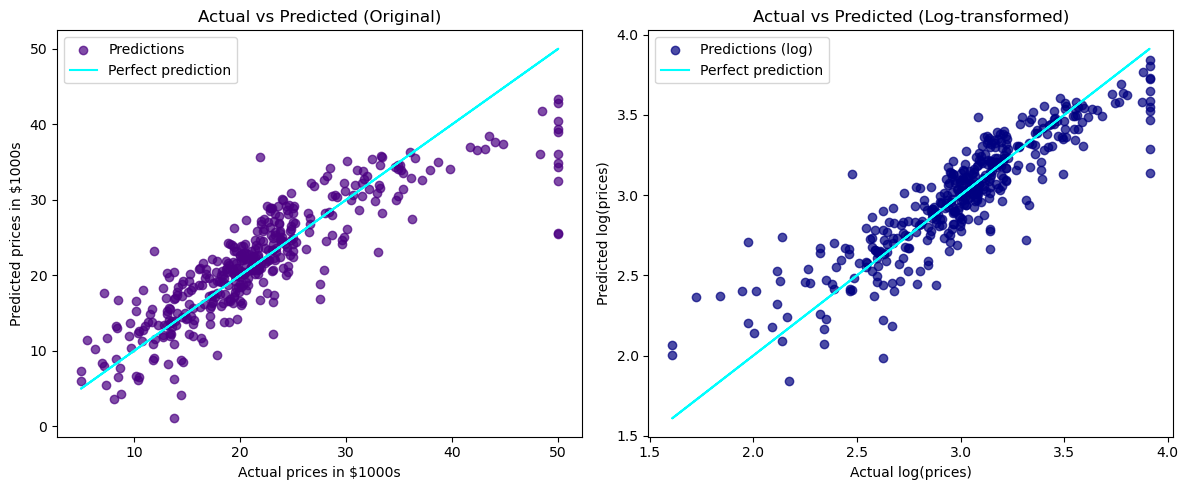

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original regression
ax1.scatter(y_train, y_train_pred, c='indigo', alpha=0.7, label='Predictions')
ax1.plot(y_train, y_train, c='cyan', label='Perfect prediction')
ax1.set_xlabel("Actual prices in $1000s")
ax1.set_ylabel("Predicted prices in $1000s")
ax1.set_title("Actual vs Predicted (Original)")
ax1.legend()

# Log-transformed regression
ax2.scatter(y_train_log, y_train_pred_log, c='navy', alpha=0.7, label='Predictions (log)')
ax2.plot(y_train_log, y_train_log, c='cyan', label='Perfect prediction')
ax2.set_xlabel("Actual log(prices)")
ax2.set_ylabel("Predicted log(prices)")
ax2.set_title("Actual vs Predicted (Log-transformed)")
ax2.legend()

plt.tight_layout()
plt.show()


#### Actual vs Predicted (Original)
- Most points cluster around the cyan line ($y = x$), showing that predictions are reasonably accurate.
- However, deviations increase at higher price points, indicating the model underpredicts or overpredicts for expensive properties.
- The spread suggests linear regression is good but not perfect—possible non-linearity in the data.

#### Actual vs Predicted (Log-transformed)
- Points are even more tightly grouped along the cyan line, especially in the dense center.
- Log transformation improves prediction accuracy for mid-range prices and helps compress outliers.
- The model fits the main data bulk better, with fewer extreme errors.

### Residual Plots

In [147]:
# Calculate the residuals for log
residuals_log = y_train_log - y_train_pred_log

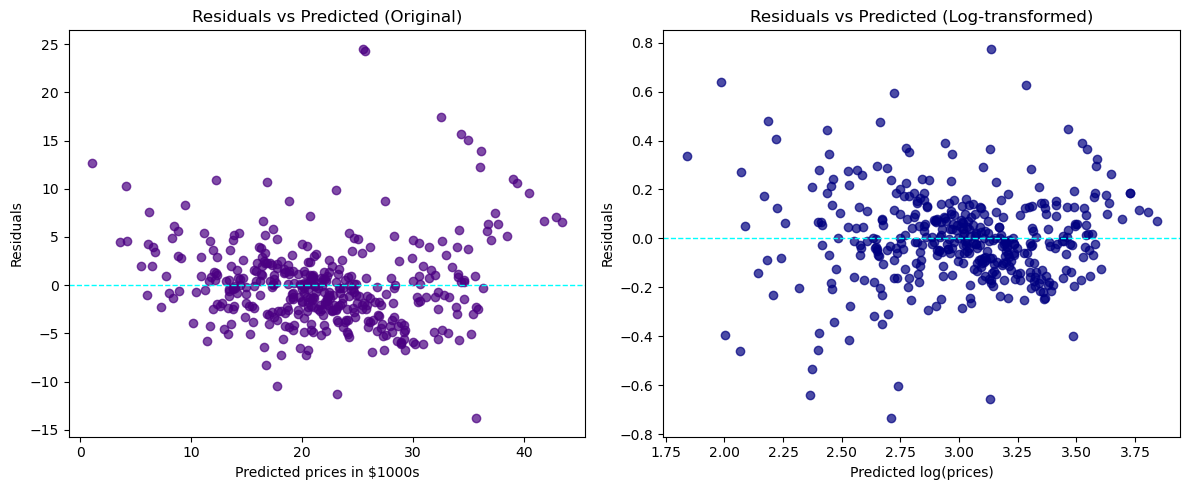

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Residuals for original regression
ax1.scatter(y_train_pred, residuals, c='indigo', alpha=0.7)
ax1.axhline(y=0, color='cyan', linestyle='--', linewidth=1)  # Reference line
ax1.set_xlabel("Predicted prices in $1000s")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Predicted (Original)")

# Residuals for log regression
ax2.scatter(y_train_pred_log, residuals_log, c='navy', alpha=0.7)
ax2.axhline(y=0, color='cyan', linestyle='--', linewidth=1)  # Reference line
ax2.set_xlabel("Predicted log(prices)")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals vs Predicted (Log-transformed)")

plt.tight_layout()
plt.show()

#### Residuals vs Predicted (Original)
- Residuals are fairly evenly spread around zero, but there is some fanning and outliers, especially at extreme predicted prices.
- The pattern suggests heteroscedasticity (variance of errors increases with price), a common issue in untransformed housing data.

#### Residuals vs Predicted (Log-transformed)
- Residuals appear more symmetric and more tightly grouped around zero after log transformation.
- Fewer large outliers and reduced error for low and high predicted values.
- This supports that log transformation stabilizes variance and improves model reliability for this dataset.

---

## Normality/ skewness
**Challenge**: 

Calculate the mean and the skew for the residuals using log prices.\
Are the mean and skew closer to 0 for the regression using log prices?

In [149]:
# Calculate mean and skew
print("Mean of residuals:", residuals_log.mean())
print("Variance of residuals:", residuals_log.var())
print("Skewness of residuals:", stats.skew(residuals_log))

Mean of residuals: 4.831119003195607e-16
Variance of residuals: 0.03373280883552628
Skewness of residuals: 0.09265377430369255


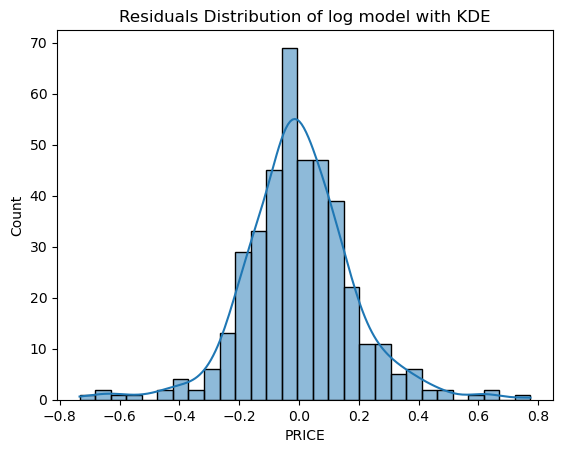

In [150]:
# Visualise distribution
sns.histplot(residuals_log, kde=True)
plt.title("Residuals Distribution of log model with KDE")
plt.show()

**Observation**:
>The log transformation fixed the right-skewness problem of the target (PRICE). Now our residuals are approximately normal and homoscedastic, which satisfies linear regression assumptions much better.

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 

**Challenge**:
Compare the r-squared of the two models on the test dataset. Which model does better? Is the r-squared higher or lower than for the training dataset? Why?

there are two methods:
- `model.score(X_test, y_test)` or `r2_score(y_test, y_test_pred)`

In [151]:
# test on simple mode
model.score(X_test, y_test)

0.6709339839115641

In [152]:
# Test on log model
model_log.score(X_test, y_test_log)

0.7446922306260739

### Statistics
- **R² Score (on test data):**
    - Simple model: **0.67** 
    - Log model: **0.74** 
    - Higher R² for the log model means more stable and reliable predictions across different price ranges. And it explains more variance in house prices.

> Conclusion
>> The **log-transformed model** outperforms the original: better R², improved error distribution, and more reliable predictions across price ranges.

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [159]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


### Challenge

Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate?\
You'll have to [reverse the log transformation with `.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp) to find the dollar value. 

In [161]:
# lets make prediction on property stats
log_price = model_log.predict(property_stats)
log_price

array([3.03028723])

In [162]:
# lets reverse it 
np.exp(log_price)

array([20.70317832])

### Challenge

Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [163]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [166]:
x1 = property_stats
x1.CHAS = int(next_to_river)
x1.RM = nr_rooms
x1.PTRATIO = students_per_classroom
x1.DIS = distance_to_town
x1.NOX = pollution
x1.LSTAT = amount_of_poverty

In [170]:
# make prediction
y1 = model_log.predict(x1)
print(f"The price is ${np.exp(y1)[0] * 1000}")

The price is $25792.025872399023
